In [388]:
import cv2
import math
import data_process_ml

import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.hub import load_state_dict_from_url
import sklearn
import pandas as pd
import copy

from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, random_split
from torchvision.datasets import VisionDataset
import os
from torch import optim

In [389]:
import data_process_ml
morpho_path = ".\AneuX\data-v1.0\data\morpho-per-cut.csv"
patient_path = ".\AneuX\data-v1.0\data\clinical.csv"
morpho_data_patient = data_process_ml.read_and_combine_data(morpho_path,patient_path)
merged_dataset = data_process_ml.encode_column(morpho_data_patient)
merged_dataset = data_process_ml.drop_columns(merged_dataset)
morpho_data_cut1,morpho_data_dome = data_process_ml.output_cut1anddome(merged_dataset)

d:\Universityofleeds\MSC_PROG\Msc_project\code\data_process_ml.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morpho_data_cut1.drop(morpho_data_cut1.columns[3:23], axis=1, inplace=True)
d:\Universityofleeds\MSC_PROG\Msc_project\code\data_process_ml.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morpho_data_cut1.drop(['source_x',"cuttype","dataset"], axis=1, inplace=True)
d:\Universityofleeds\MSC_PROG\Msc_project\code\data_process_ml.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [390]:
morpho_data_cut1

,writhe-original-H,writhe.1-original-mean,writhe.2-original-std,writhe.3-L1norm-H,writhe.4-L1norm-mean,writhe.5-L1norm-std,writhe.6-L2-H,writhe.7-L2-mean,writhe.8-L2-std,zmi_surf-0.0-0.0,...,zmi_surf.135-energy-n15,zmi_surf.136-energy-n16,zmi_surf.137-energy-n17,zmi_surf.138-energy-n18,zmi_surf.139-energy-n19,zmi_surf.140-energy-n20,age,sex_female,sex_male,status_ruptured
0,3.13602,0.686535,6.38481,-1.60037,0.330408,0.0534176,1.23964,6.05006,0.881166,0.891258,...,43.646,45.5701,47.4192,49.5589,52.4916,54.9455,64.2,1.0,0.0,0.0
4,2.28995,-0.123443,2.53599,-1.17942,0.312721,0.0778531,1.33947,4.88757,1.00908,1.071280,...,38.9036,42.1663,44.2741,46.3791,47.4028,49.1238,72.7,1.0,0.0,0.0
8,2.32917,-0.00466042,2.70505,-1.51013,0.212483,0.0667921,1.6863,5.88084,1.56453,1.435430,...,35.6309,37.6116,39.7437,41.7172,44.1529,45.8037,50.9,0.0,1.0,0.0
12,2.52705,-0.021154,3.17756,-1.49203,0.251283,0.0746368,1.82116,7.80336,1.92642,1.272820,...,38.4547,40.9813,43.2989,45.1772,47.5794,49.8087,47.3,1.0,0.0,1.0
16,2.98359,-0.395319,5.1354,-1.43807,0.349662,0.061156,1.167,5.40205,0.851545,0.822235,...,51.9063,55.152,58.0832,59.6127,60.9068,62.4867,47.3,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756,1.87399,-0.00474863,1.65733,-1.17324,0.253628,0.0834412,1.42177,3.83603,1.08127,1.269270,...,33.1295,35.0355,37.64,40.1607,42.3614,43.8509,43.0,1.0,0.0,0.0
2760,1.5737,0.00373571,1.3765,-1.41009,0.218476,0.0835751,1.69978,5.23269,1.65098,1.378590,...,34.7983,37.8419,40.0753,41.8086,43.2362,45.5748,67.0,0.0,1.0,1.0
2764,2.46928,0.277979,3.02867,-1.34477,0.351678,0.0659528,1.2976,5.8804,0.980592,1.060260,...,39.9266,41.9626,44.2732,47.1096,50.0711,52.9587,84.0,1.0,0.0,1.0
2768,1.96354,0.0263473,1.87208,-1.51831,0.18834,0.0830219,1.7068,5.97952,2.06504,1.340760,...,35.7781,39.4211,40.5627,42.223,43.9946,46.1836,59.0,1.0,0.0,1.0


In [391]:
morpho_data_dome

,curvature-gauss--L2N,curvature.1-gauss-H,curvature.2-gauss-L2N,curvature.3-gauss-L2NCH,curvature.4-mean--L2N,curvature.5-mean-H,curvature.6-mean-L2N,curvature.7-mean-L2NCH,gi-shape-AR,gi.1-shape-BF,...,zmi_surf.135-energy-n15,zmi_surf.136-energy-n16,zmi_surf.137-energy-n17,zmi_surf.138-energy-n18,zmi_surf.139-energy-n19,zmi_surf.140-energy-n20,age,sex_female,sex_male,status_ruptured
2,0.725242,-0.0894094,2.60987,1.18701,0.198244,0.086614,1.86744,1.08866,0.876819,1.27173,...,28.1611,30.1846,32.0237,33.6042,35.1063,37.0662,64.2,1.0,0.0,0.0
6,0.524537,-0.360007,2.159,1.15799,0.0966873,-0.10215,1.69953,1.04997,0.991997,1.27592,...,27.2715,28.7998,31.0452,32.5206,34.0207,35.5299,72.7,1.0,0.0,0.0
10,1.96624,-1.21471,5.05633,1.32342,0.382815,-0.363665,2.30735,1.12822,1.07643,1.84807,...,30.9718,33.1091,35.1017,36.6565,38.4389,40.3165,50.9,0.0,1.0,0.0
14,7.7887,-0.823071,12.3872,2.40789,1.01931,-0.0544958,3.12703,1.35978,2.61395,3.16959,...,33.5714,35.2654,37.352,39.6833,41.1798,43.012,47.3,1.0,0.0,1.0
18,0.997234,0.089572,3.13267,1.2543,0.217909,0.224675,2.01593,1.0945,1.65683,1.53188,...,33.6385,36.6105,37.7905,38.8626,40.1787,42.9034,47.3,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2758,0.721845,-0.296889,2.56924,1.28583,0.232378,-0.00342363,1.77134,1.08248,0.846195,1.21771,...,27.0863,28.7959,30.044,31.6594,33.5313,35.0494,43.0,1.0,0.0,0.0
2762,4.12822,-0.645817,6.74744,1.74333,0.647408,-0.0426904,2.48483,1.17665,1.22381,1.75334,...,30.977,32.9759,35.4072,37.0025,38.3394,40.0176,67.0,0.0,1.0,1.0
2766,2.58888,-0.0131127,3.83658,1.76325,0.585148,0.180077,2.00644,1.15457,1.62177,1.43968,...,31.0267,33.1905,35.183,37.068,38.5364,40.3243,84.0,1.0,0.0,1.0
2770,2.05335,-1.52289,5.4371,1.43257,0.520694,-0.527362,2.26569,1.13279,1.56048,1.5928,...,28.9163,30.6686,33.3345,34.573,35.9075,37.5832,59.0,1.0,0.0,1.0


In [392]:
print(morpho_data_dome[morpho_data_dome['status_ruptured'] == 1].count())

curvature-gauss--L2N       261
curvature.1-gauss-H        261
curvature.2-gauss-L2N      261
curvature.3-gauss-L2NCH    261
curvature.4-mean--L2N      261
                          ... 
zmi_surf.140-energy-n20    261
age                        252
sex_female                 261
sex_male                   261
status_ruptured            261
Length: 174, dtype: int64


In [393]:
# read data

class AneuxDataset_Morph(Dataset):

    def __init__(self, df, transform = None):

        self.transform = transform
        self.df = df.astype(float)
        self.label = df["status_ruptured"].copy()
        self.label = torch.from_numpy(np.array(self.label, dtype= int)) 
        self.raw_data = copy.deepcopy(self.df)
        self.raw_data.loc[self.raw_data['sex_male'] == 0, 'sex_male'] = 2
        #print(self.raw_data.iloc[0])
        self.raw_data.drop(("status_ruptured"),axis=1,inplace=True)
        self.raw_data.drop(("sex_female"),axis=1,inplace=True)
        self.raw_data.drop(("age"),axis=1,inplace=True)
        self.raw_data = self.raw_data
        self.my_device = "cuda:0"
    
    def __getitem__(self, index):
        
        """ Returns one data pair (image and target caption). """
        
        data = torch.from_numpy(np.array(self.raw_data.iloc[index],dtype = np.float64))
        label = self.label[index]
        #print(type(image))
        if self.transform is not None:      
            data= self.transform(data)
            
        return data,label

    def __len__(self):
                                
        return len(self.label)

load data

In [394]:
#Morph_data = AneuxDataset_Morph(morpho_data_cut1,transform = None)
from torch.utils.data import Subset
Morph_data = AneuxDataset_Morph(morpho_data_dome,transform = None)
train_size = int(len(Morph_data) * 0.8) # 80% training data
valid_size = len(Morph_data) - train_size
train_data, valid_data = random_split(Morph_data, [train_size, valid_size])

indices_label_0 = torch.where(Morph_data.label == 0)[0]
indices_label_1 = torch.where(Morph_data.label == 1)[0]

train_indices = torch.cat((indices_label_0[torch.randperm(len(indices_label_0))[:int(474*0.8)]], indices_label_1[torch.randperm(len(indices_label_1))[:int(261*0.8)]]))
remaining_indices = torch.cat((indices_label_0[torch.randperm(len(indices_label_0))[int(474*0.8):]], indices_label_1[torch.randperm(len(indices_label_1))[int(261*0.8):]]))


train_dataset = Subset(Morph_data, train_indices)
valid_dataset = Subset(Morph_data, remaining_indices)

train_labels = torch.tensor([Morph_data.label[idx] for idx in train_indices])
valid_labels = torch.tensor([Morph_data.label[idx] for idx in remaining_indices])

train_loader = torch.utils.data.DataLoader(
    train_data,
    batch_size=20,
    shuffle=True,
    #num_workers=2, 
    pin_memory=True
)

valid_loader = torch.utils.data.DataLoader(
    valid_data,
    batch_size=20, # Forward pass only so batch size can be larger
    shuffle=False,
    #num_workers=2, 
    pin_memory=True
)

In [395]:
print("Train labels distribution:", torch.bincount(train_labels.int()))
print("Validation labels distribution:", torch.bincount(valid_labels.int()))

Train labels distribution: tensor([379, 208])
Validation labels distribution: tensor([95, 53])


In [396]:
len(train_loader)

30

In [411]:
a = 0
b = 0
for data in train_data:
    input,label = data
    if label == 1:
        a += 1
    else:
        b+=1
print(a, b)

215 373


In [398]:
device = "cuda"
def stats(loader, net):
    correct = 0
    total = 0
    running_loss = 0
    n = 0    # counter for number of minibatches
    with torch.no_grad():
        for data in loader:
            inputs_v, labels = data
            
            loss_fn = nn.CrossEntropyLoss()

            #to work with gpu you will need to load data and labels to gpu
            inputs_v = inputs_v.to(device)
            labels = labels.to(device)
            
            inputs_v = inputs_v.to(torch.float32)
            labels = labels.to(torch.long)

            outputs = net.forward(inputs_v)

            # accumulate loss
            running_loss += loss_fn(outputs, labels)
            n += 1

            # accumulate data for accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)    # add in the number of labels in this minibatch
            correct += (predicted == labels).sum().item()  # add in the number of correct labels

    return running_loss/n, correct/total


# run model
def run_model_get(train_loader_input,vaild_loader_input,nepochs, modelnet,results_path, filename, transform = None,dataset =None):
    os.makedirs(results_path, exist_ok = True)
    saveCkpt = results_path + filename
    statsrec = np.zeros((4,nepochs))
    modelnet = modelnet.to(device)
    max_atst = 0
    for epoch in range(nepochs):  # loop over the dataset multiple times
        correct = 0          # number of examples predicted correctly (for accuracy)
        total = 0            # number of examples
        epoch_loss = 0.0   # accumulated loss (for mean loss)
        n = 0
        
        if transform != None:
            dataset.transform_image(transform)  
                        
        for data in train_loader_input:
            inputs, labels = data
            #print(inputs, labels)
            
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            inputs = inputs.to(torch.float32)
            labels = labels.to(torch.float32)
            #print(labels)
            modelnet.optimizer.zero_grad()
            # Forward, backward, and update parameters
            loss = modelnet.fit(inputs, labels) # note: .to(device) helps to load data to your gpu
            # accumulate loss
            epoch_loss += loss
            n += 1
            outputs = modelnet.forward(inputs)
            # accumulate data for accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)    # add in the number of labels in this minibatch
            correct += (predicted == labels).sum().item()  # add in the number of correct labels

        # collect together statistics for this epoch
        ltrn = epoch_loss/n
        atrn = correct/total
        ltst, atst = stats(vaild_loader_input, modelnet)

        ltst = ltst.item() #item() moves the tensor data with 1 element to CPU

        statsrec[:,epoch] = (ltrn, atrn, ltst, atst)
        print(f"epoch: {epoch} training loss: {ltrn: .3f} training accuracy: {atrn: .1%}  test loss: {ltst: .3f} test accuracy: {atst: .1%}")
        
        if atst > max_atst:
            model_path = "DNN_dome_lr0.0001_epoch_test.pth"
            torch.save(modelnet.state_dict(), model_path)
            max_atst = atst

    # save network parameters, losses and accuracy
    torch.save({"state_dict": modelnet.state_dict(), "stats": statsrec}, saveCkpt)


# A simple DNN MODEL with 3 FCL

In [399]:
class DNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, hidden_size2, output_size):
        super(DNNModel, self).__init__()

        # Define layers
        self.Flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.loss_fn = nn.CrossEntropyLoss()
        self.logsoftmax = nn.LogSoftmax(dim=1)
        self.dropout = nn.Dropout(p=0.3)
        
        #Adam
        #self.optimizer = optim.Adam(self.parameters(), lr=0.001) #weight decay
        self.optimizer = optim.Adam(self.parameters(), lr=0.00001)
        self.running_loss = 0
        self.loss = None
        self.losses = []

    def forward(self, x, target =None):
        # Forward pass
        #x = self.Flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        
        return x
    def fit(self, x, targets):
        #train/optimize/fit
        preds = self.forward(x)
        #print(preds, targets)
        self.loss = self.loss_fn(preds, targets.long())
        self.loss.backward()
        self.optimizer.step()
        
        loss_item = self.loss.item()
        return loss_item


    def reset_loss(self, value):
        self.running_loss = value
        self.losses = []
        return

In [400]:
DNN3Fcl = DNNModel(171,256,128,2)

run_model_get(train_loader_input = train_loader,
                        vaild_loader_input = valid_loader,
                        nepochs = 100, 
                        modelnet = DNN3Fcl,
                        results_path = "./result", 
                        filename = "/DNN_test.pt")

epoch: 0 training loss:  1.242 training accuracy:  62.9%  test loss:  0.860 test accuracy:  68.7%
epoch: 1 training loss:  0.920 training accuracy:  62.4%  test loss:  0.704 test accuracy:  68.7%
epoch: 2 training loss:  0.753 training accuracy:  62.6%  test loss:  0.650 test accuracy:  68.7%
epoch: 3 training loss:  0.688 training accuracy:  63.3%  test loss:  0.642 test accuracy:  68.7%
epoch: 4 training loss:  0.665 training accuracy:  63.4%  test loss:  0.640 test accuracy:  68.7%
epoch: 5 training loss:  0.658 training accuracy:  63.3%  test loss:  0.639 test accuracy:  67.3%
epoch: 6 training loss:  0.651 training accuracy:  64.6%  test loss:  0.638 test accuracy:  68.0%
epoch: 7 training loss:  0.651 training accuracy:  63.4%  test loss:  0.633 test accuracy:  68.7%
epoch: 8 training loss:  0.647 training accuracy:  64.3%  test loss:  0.635 test accuracy:  68.7%
epoch: 9 training loss:  0.650 training accuracy:  64.5%  test loss:  0.628 test accuracy:  69.4%
epoch: 10 training l

In [401]:
def show_graph(path,device):
    data = torch.load(path, map_location=device) # by doing map_location=device, you can use trained model on GPU --> to test on CPU
    statsrec = data["stats"]
    fig, ax1 = plt.subplots()
    plt.plot(statsrec[0], 'r', label = 'training loss', )
    plt.plot(statsrec[2], 'g', label = 'test loss' )
    plt.legend(loc='lower right')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Training and test loss, and test accuracy')
    ax2=ax1.twinx()
    ax2.plot(statsrec[1], 'm', label = 'training accuracy')
    ax2.plot(statsrec[3], 'b', label = 'test accuracy')
    ax2.set_ylabel('accuracy')
    plt.legend(loc='upper right')
    fig.savefig("roc.svg")
    plt.show()

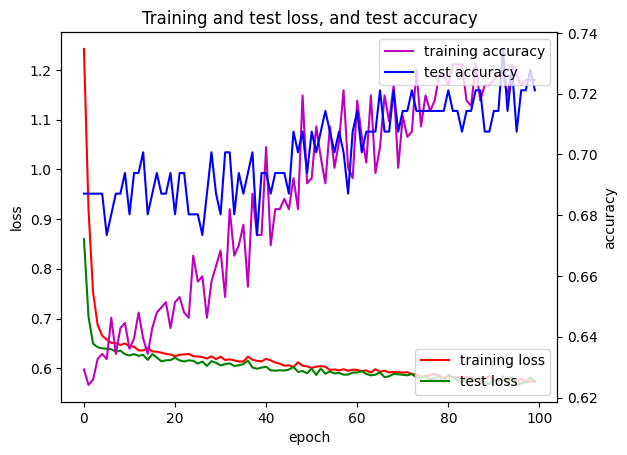

In [402]:
device = torch.device('cuda:0')
show_graph(path ="./result/DNN_test.pt",device = "cuda")

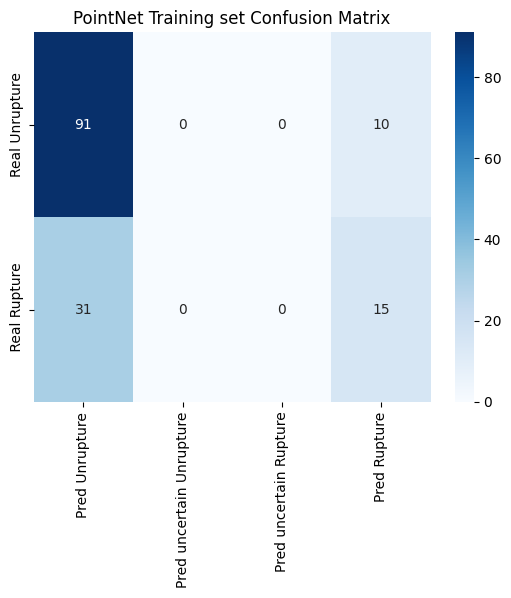

In [403]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import functions as fun

def dim4_cm (real, pred,pred_result):

    cm = [[0,0,0,0],[0,0,0,0]]
    for i in range(len(pred)):
        pos = 0
        if float(pred[i]) < 0.6 and pred_result[i] == 0:
            pos = 1
        elif float(pred[i]) >= 0.6 and pred_result[i] == 0:
            pos = 0
        if float(pred[i]) < 0.6 and pred_result[i] == 1:
            pos = 2
        elif float(pred[i]) >= 0.6 and pred_result[i] == 1:
            pos = 3
            
            
        if real[i] == 0:

            cm[0][pos] += 1
        else:
            cm[1][pos] += 1
    return cm

y_true = []
y_pred = []
y_pred_result = []
pointnet_copy = DNN3Fcl.to("cpu")
with torch.no_grad():
    for inputs_v,labels in valid_loader:
        inputs_v = inputs_v.to(torch.float32)
        labels = labels.to(torch.long)
        outputs = pointnet_copy.forward(inputs_v)
        
        #print(torch.exp(outputs))

        outputs_value = (torch.max(torch.exp(outputs), 1)[0]).data.cpu().numpy()
        outputs_result = (torch.max(torch.exp(outputs), 1)[1]).data.cpu().numpy()
        
        
        #print(outputs)
        y_pred.extend(outputs_value)
        y_pred_result.extend(outputs_result)
            
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) 


cm = dim4_cm(y_true, y_pred,y_pred_result)  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred Unrupture","Pred uncertain Unrupture","Pred uncertain Rupture","Pred Rupture"], yticklabels=["Real Unrupture"," Real Rupture"])
#fun.show_pred_cm(cm,y_true)  
# classes = ["Unrupture","Rupture"]    
# cf_matrix = confusion_matrix(y_true, y_pred)
# plt.figure(figsize=(10, 8)) 
# sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes,annot_kws={"size": 9})
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
plt.title("PointNet Training set Confusion Matrix")
plt.show()

# CNN MODEL 3 CONV & 3 FCL

In [404]:
class CNNModel(nn.Module):
    def __init__(self, input_size,input_channel, kernel_size, middle_channel, output_channel,hidden_input,output_size,padding = 0, Drop = 0.1):
        super(CNNModel, self).__init__()
        reduce_size = 0
        size = input_size
        if padding == 0:
            reduce_size = size - kernel_size +1
            reduce_size = reduce_size/2
            reduce_size = reduce_size - kernel_size +1
            reduce_size = int(reduce_size/2)
        else:
            reduce_size = int(size/4)
        # Define layers
        self.Drop = Drop
        self.Dropout = nn.Dropout(p=self.Drop)
        self.Conv2d1 = nn.Conv2d(in_channels=input_channel,out_channels=middle_channel, kernel_size=kernel_size,padding = padding)
        self.ReLU = nn.ReLU()
        self.MaxPool2d = nn.MaxPool2d(kernel_size=2, stride=2)
        self.Conv2d2 = nn.Conv2d(in_channels=middle_channel,out_channels=output_channel, kernel_size=kernel_size,padding = padding)
        self.Flatten = nn.Flatten()
        self.fc1 = nn.Linear(output_channel*reduce_size*reduce_size,hidden_input)
        self.fc2 = nn.Linear(hidden_input,output_size)
        
        self.loss_fn = nn.CrossEntropyLoss()
        #self.optimizer = optim.Adam(self.parameters(), lr=0.001)
        self.optimizer = optim.SGD(self.parameters(), lr=0.001,momentum=0.9) 
        self.running_loss = 0
        self.loss = None
        self.losses = []
        self.dropout_enable = False
        
    def forward(self, x, target = None):

            
        x = self.Conv2d1(x)
        x = self.ReLU(x)
        
        if self.dropout_enable:
            x = self.Dropout(x)
            
        x = self.MaxPool2d(x)
        x = self.Conv2d2(x)
        x = self.ReLU(x)
        x = self.MaxPool2d(x)
        x = self.Flatten(x)
        x = self.fc1(x)
        x = self.ReLU(x)
        if self.dropout_enable:
            x = self.Dropout(x)
        x = self.fc2(x)

        #update
        
        return x


    def fit(self, x, targets):
        #train/optimize/fit
        preds = self.forward(x)
        self.loss = self.loss_fn(preds, targets)
        self.loss.backward()
        self.optimizer.step()
        
        loss_item = self.loss.item()
        return loss_item


    def reset_loss(self):
        self.running_loss = 0
        self.loss = None
        return

# RNN Model

In [405]:
class RNNModel(nn.Module):
    def __init__(self, input_size,input_channel, kernel_size, middle_channel, output_channel,hidden_input,output_size,padding = 0, Drop = 0.1):
        super(CNNModel, self).__init__()
        self.LSTM = nn.LSTM()
        self.RNN = nn.GLU()

        
    def forward(self, x, target = None):

            
        x = self.Conv2d1(x)
        x = self.ReLU(x)
        
        if self.dropout_enable:
            x = self.Dropout(x)
            
        x = self.MaxPool2d(x)
        x = self.Conv2d2(x)
        x = self.ReLU(x)
        x = self.MaxPool2d(x)
        x = self.Flatten(x)
        x = self.fc1(x)
        x = self.ReLU(x)
        if self.dropout_enable:
            x = self.Dropout(x)
        x = self.fc2(x)

        #update
        
        return x


    def fit(self, x, targets):
        #train/optimize/fit
        preds = self.forward(x)
        self.loss = self.loss_fn(preds, targets)
        self.loss.backward()
        self.optimizer.step()
        
        loss_item = self.loss.item()
        return loss_item


    def reset_loss(self):
        self.running_loss = 0
        self.loss = None
        return